# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Decision Tree

In [3]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

In [4]:
param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

In [5]:
result, model, cv, loss, all_cv = runner.search_paramsv2(dt, param_distributions_dt, 'decision_tree',
                              [X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=100)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.915707,0.110547,0.895190,0.842219,0.852772,0.818182,0.811951,0.846428,"[0.0, 0.11909568025837707, 1.0]","[0.0, 0.81195079086116, 1.0]",./models/decision_tree/0.pkl
1,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.916731,0.110291,0.893294,0.844131,0.854924,0.821102,0.816052,0.848882,"[0.0, 0.1182882519176423, 1.0]","[0.0, 0.8160515524311658, 1.0]",./models/decision_tree/1.pkl
2,"{'min_samples_split': 100, 'min_samples_leaf':...",0.910601,0.107520,0.873213,0.833134,0.846319,0.813136,0.819566,0.842161,"[0.0, 0.13524424707307225, 1.0]","[0.0, 0.8195664909197422, 1.0]",./models/decision_tree/2.pkl
3,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.916939,0.110619,0.891911,0.844848,0.856119,0.822837,0.818981,0.850346,"[0.0, 0.1182882519176423, 1.0]","[0.0, 0.8189806678383128, 1.0]",./models/decision_tree/3.pkl
4,"{'min_samples_split': 100, 'min_samples_leaf':...",0.911206,0.106682,0.873879,0.832656,0.846080,0.813008,0.820152,0.842050,"[0.0, 0.13605167541380703, 1.0]","[0.0, 0.8201523140011716, 1.0]",./models/decision_tree/4.pkl
5,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.908332,0.121923,0.930588,0.851064,0.856358,0.822347,0.814880,0.849911,"[0.0, 0.11505853855470327, 1.0]","[0.0, 0.814879906268307, 1.0]",./models/decision_tree/5.pkl
6,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.914461,0.116875,0.895907,0.841262,0.851338,0.816194,0.809022,0.844761,"[0.0, 0.11949939442874445, 1.0]","[0.0, 0.8090216754540129, 1.0]",./models/decision_tree/6.pkl
7,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.914171,0.118089,0.924594,0.851542,0.858270,0.825742,0.823081,0.852800,"[0.0, 0.11748082357690755, 1.0]","[0.0, 0.8230814294083187, 1.0]",./models/decision_tree/7.pkl
8,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.916731,0.108900,0.893294,0.844131,0.854924,0.821102,0.816052,0.848882,"[0.0, 0.1182882519176423, 1.0]","[0.0, 0.8160515524311658, 1.0]",./models/decision_tree/8.pkl
9,"{'min_samples_split': 7, 'min_samples_leaf': 2...",0.914256,0.104819,0.884842,0.838633,0.860182,0.827281,0.820738,0.854051,"[0.0, 0.112636253532499, 1.0]","[0.0, 0.820738137082601, 1.0]",./models/decision_tree/9.pkl


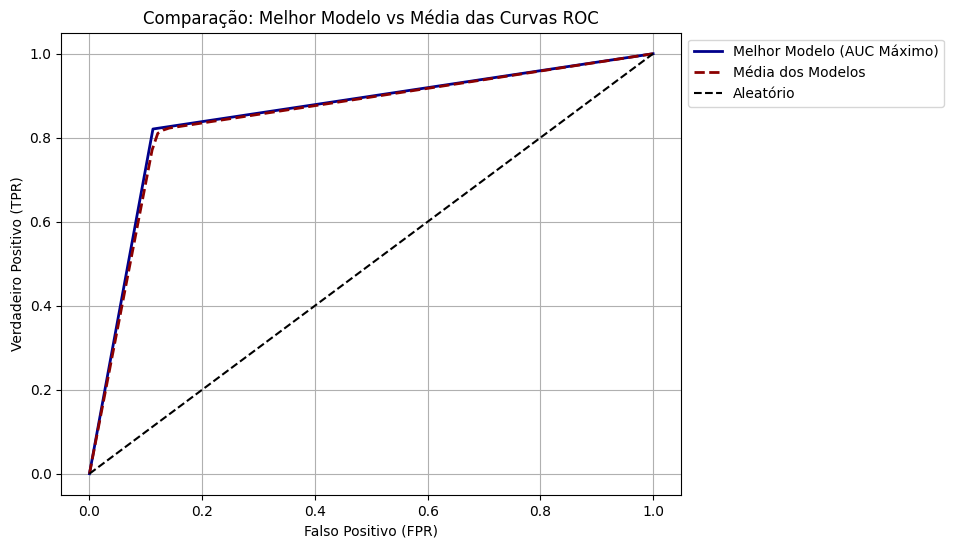

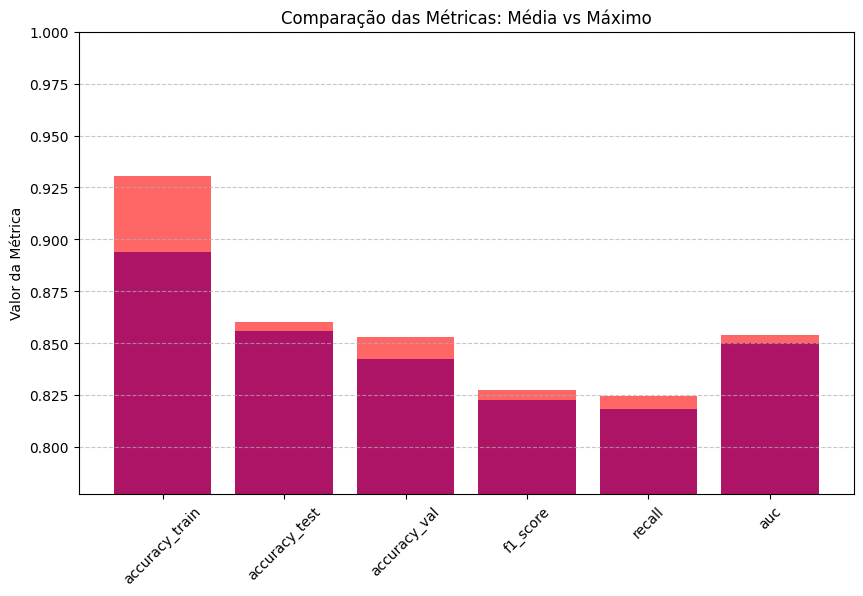

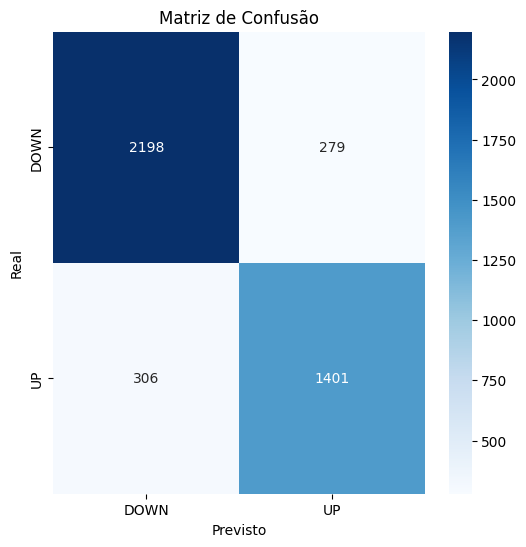

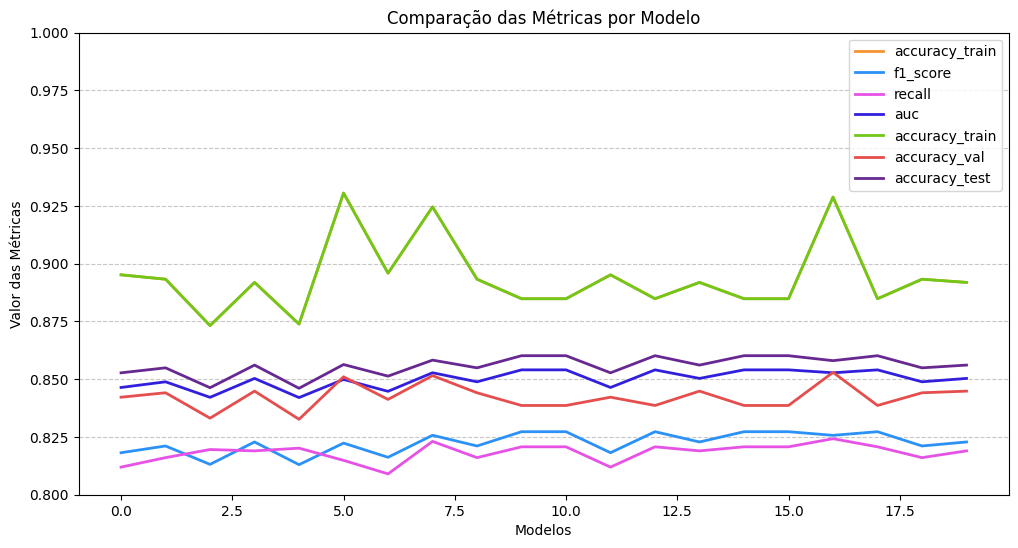

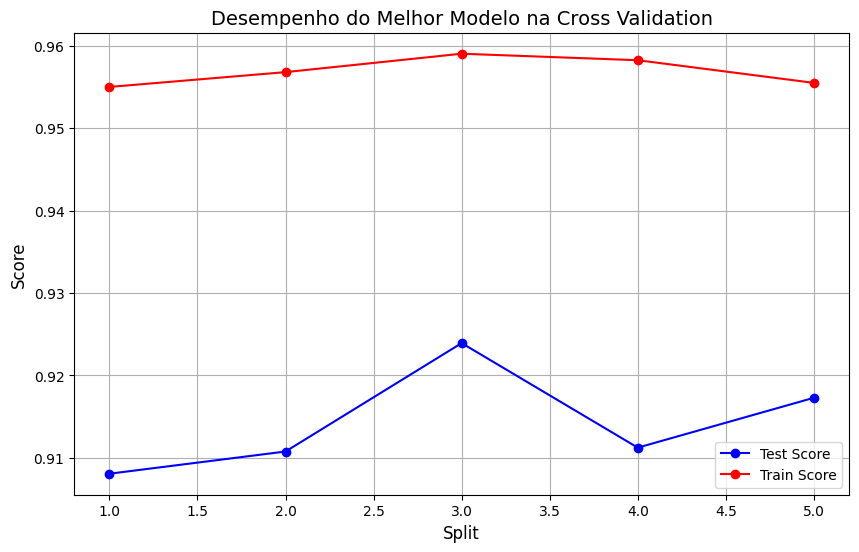

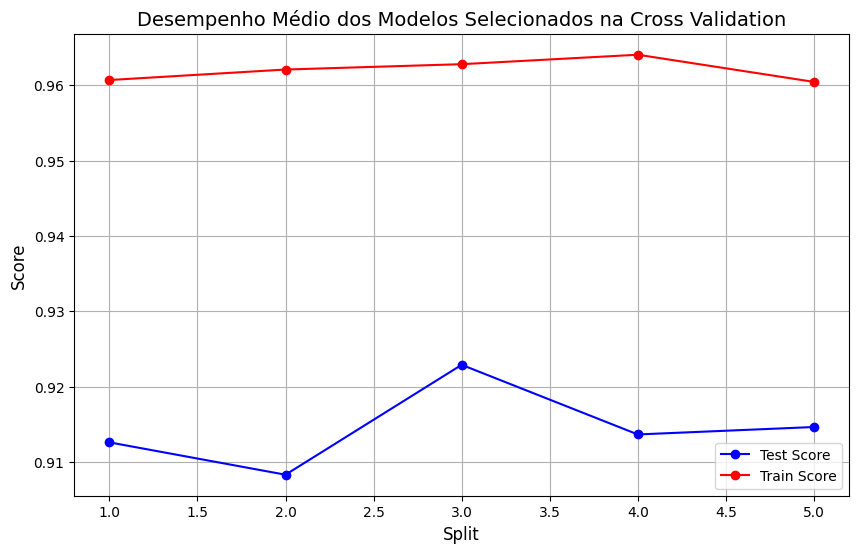

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 51, 'splitter': 'best'}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 0.9306
  - **Média**: 0.8941
  - **Desvio Padrão**: 0.0156
  - **Valor no Modelo Selecionado**: 0.8848

- **Accuracy val**:
  - **Melhor valor geral**: 0.8530
  - **Média**: 0.8423
  - **Desvio Padrão**: 0.0053
  - **Valor no Modelo Selecionado**: 0.8386

- **Accuracy test**:
  - **Melhor valor geral**: 0.8602
  - **Média**: 0.8558
  - **Desvio Padrão**: 0.0042
  - **Valor no Modelo Selecionado**: 0.8602

- **F1 score**:
  - **Melhor valor geral**: 0.8273
  - **Média**: 0.8224
  - **Desvio Padrão**: 0.0046
  - **Valor no Modelo Selecionado**: 0.8273

- **Auc**:
  - **Melhor valor geral**: 0.8541
  - **Média**: 0.8500
  - **Desvio Padrão**: 0.0038
  - **Valor no Modelo Selecionado**: 0.8541

- **Recall**:
  - **Melhor valor geral**: 0.8243
  - **Média**: 0.8182
  - **Desvio Padrão**: 0.0038
  - **Valor no Modelo Selecionado**: 0.8207



In [6]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))